# Central Alps - Trentino download

We want to cover the rectangle Basel-Bard-Trento-Innsbruck
aka `[[[7.734,45.583], [11.249,45.583], [11.249,47.517], [7.734, 47.517], [7.734,45.583]]]`.

The output of this notebook should be a file `data/AlpC-styrol-slopes.tif`

I was not able to automate the download step as the download links seem generated on the fly.

* start from [geocatalogo.retecivica.bz.it/geokatalog](http://geocatalogo.retecivica.bz.it/geokatalog/).
* in "Cerca dato", search *Modello Digitale del Terreno (DTM 2,5m)* (italian) or *Digitales Geländemodell Südtirols (DGM 2,5m)* (german)
* tick "Visualizza sulla mappa"
* in *Download* tab, *Modalità di selezione* : *Quadro d'Unione 1:10000*
* select in total **261** tiles (I hope), possibly in several steps.
* fill *email*, then *Scarica*, and receive links by emails 
* extract all links from mails with `grep -o 'http.*.zip' mails.txt >! links.txt`
* download with `wget -i links.txt`

In [2]:
# Preamble - Execute only once

%load_ext autoreload
%autoreload 2

import os
NBROOT = os.path.realpath(os.curdir)

In [7]:
# Preamble
import logging
logging.basicConfig(level=logging.DEBUG)

# stdlib
import re
from os.path import basename, exists, join as pjoin, realpath
from pathlib import Path
from urllib.request import urlopen, urlretrieve
from zipfile import ZipFile

#external
from IPython.display import Image

# self
from src import bbox, gdal_slope_util as S
# from src.gdal_slope_util import check_run, DFLT_OPT, ZSTD_OPT, TILE_OPT

# CPL_ZIP_ENCODING for gdal vsizip:  https://github.com/conda-forge/gdal-feedstock/issues/83
os.environ['CPL_ZIP_ENCODING'] = 'UTF-8'

!mkdir -p data/dtm_final

In [4]:
TNT_DTM = realpath('data/dtm_final/trentino_dtm.tif')
# assert(exists('data/styrol/dwnweb'))
!mkdir -p data/trentino
%cd data/trentino

/home/me/code/eddy-geek/slope-ign-alti/trentino



[Trentino](https://translate.google.com/?sl=auto&tl=fr&text=http%3A%2F%2Fwww.territorio.provincia.tn.it%2Fportal%2Fserver.pt%2Fcommunity%2Flidar%2F847%2Flidar%2F23954&op=translate)

EPSG:25832

https://siat.provincia.tn.it/stem/services/file?id=116842&token=1d6ktnjsn0qiejfripki8jnj1f8l4kefgo505l7j48chhgkntad67nddmeshfls0rm54e3nmqc6vqv5iah3lth2ebfpt9gqcg0q6t12

In [ ]:
# Website found "randomly" via https://geodati.gov.it/geoportalRNDTPA/rest/document?id=p_TN%3A3203e1b3-5d73-47d8-b04e-9ab27c8538cf
!wget https://idt.provincia.tn.it/idt/raster/lidar_2009_pat_dtm_2mX2m/dtm000001_wor.tif

0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


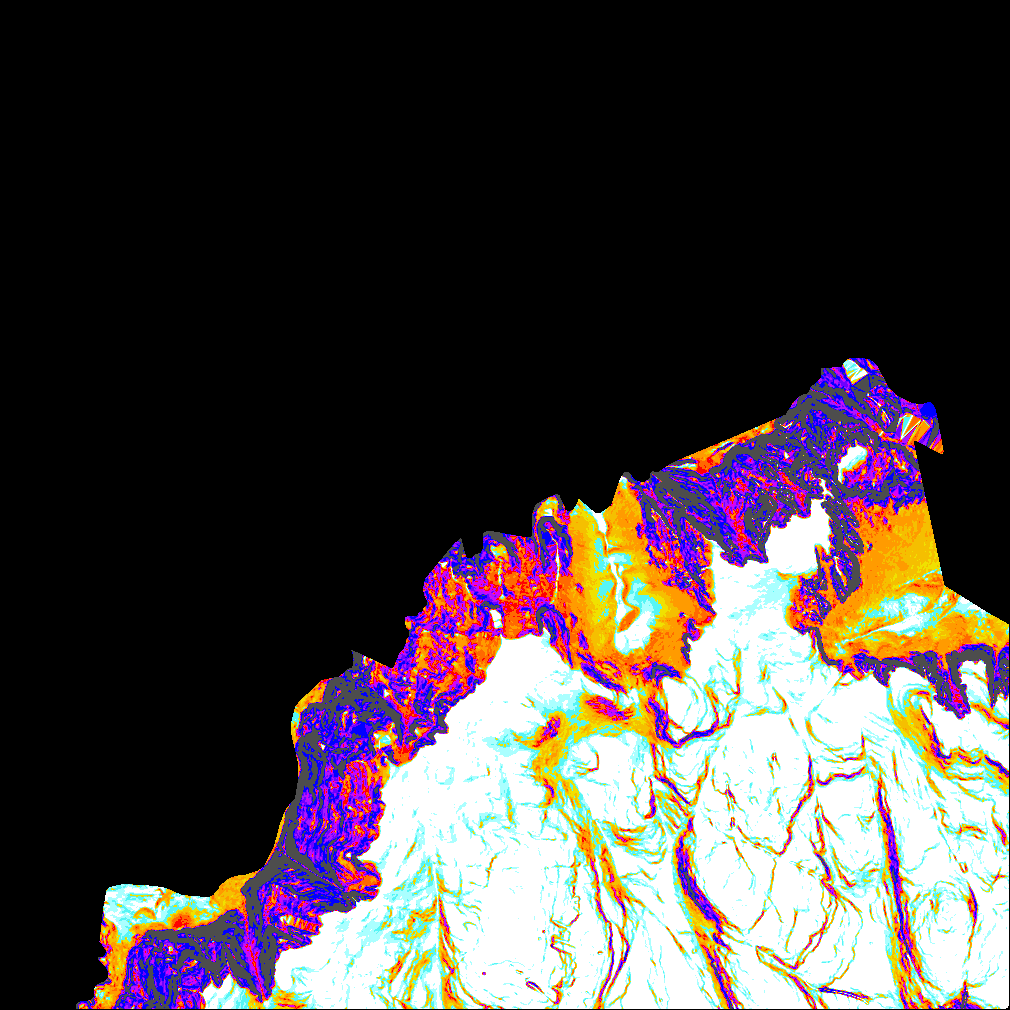

In [10]:
S.eslo_tiny('dtm000001_wor.tif')
Image('/tmp/tiny_eslo13near.png', height=200)

In [16]:
index = urlopen('https://idt.provincia.tn.it/idt/raster/lidar_2009_pat_dtm_2mX2m/').read().decode()

In [20]:
import re
!mkdir -p dwn

suffixes = re.findall(r'/idt/raster/lidar_2009_pat_dtm_2mX2m/dtm[^"<>]*\.tif', index)
for suff in suffixes:
    dest = pjoin('dwn', basename(suff))
    if not exists(dest):
        urlretrieve('https://idt.provincia.tn.it'+suff, dest)

# ~350 files x 0.3 minutes = 2h

In [21]:
# The projection is *not* included in the files!
!gdalbuildvrt -a_srs EPSG:25832 -overwrite trento_dtm.vrt dwn/dtm*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [22]:
!gdalinfo -nofl trento_dtm.vrt | rg -v '\['

Driver: VRT/Virtual Raster
Files: trento_dtm.vrt
Size is 60010, 49010
Coordinate System is:
Data axis to CRS axis mapping: 1,2
Origin = (611990.000000000000000,5158010.000000000000000)
Pixel Size = (2.000000000000000,-2.000000000000000)
Corner Coordinates:
Upper Left  (  611990.000, 5158010.000) ( 10d27'40.62"E, 46d33'58.76"N)
Lower Left  (  611990.000, 5059990.000) ( 10d26'17.32"E, 45d41' 3.88"N)
Upper Right (  732010.000, 5158010.000) ( 12d 1'32.50"E, 46d32' 8.24"N)
Lower Right (  732010.000, 5059990.000) ( 11d58'40.26"E, 45d39'16.69"N)
Center      (  672000.000, 5109000.000) ( 11d13'33.05"E, 46d 6'46.44"N)
Band 1 Block=128x128 Type=Float32, ColorInterp=Gray
  NoData Value=-9999


In [23]:
opt = S.DFLT_OPT
!gdal_translate $opt trento_dtm.vrt ../dtm_final/trento_dtm.tif
# 20 seconds

Input file size is 60010, 49010
0...10...20...30...40...50...60...70...80...90...100 - done.


In [27]:
!gdalinfo ../dtm_final/trento_dtm.tif | rg -v '\['

Driver: GTiff/GeoTIFF
Files: ../dtm_final/trento_dtm.tif
Size is 60010, 49010
Coordinate System is:
Data axis to CRS axis mapping: 1,2
Origin = (611990.000000000000000,5158010.000000000000000)
Pixel Size = (2.000000000000000,-2.000000000000000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=ZSTD
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  (  611990.000, 5158010.000) ( 10d27'40.62"E, 46d33'58.76"N)
Lower Left  (  611990.000, 5059990.000) ( 10d26'17.32"E, 45d41' 3.88"N)
Upper Right (  732010.000, 5158010.000) ( 12d 1'32.50"E, 46d32' 8.24"N)
Lower Right (  732010.000, 5059990.000) ( 11d58'40.26"E, 45d39'16.69"N)
Center      (  672000.000, 5109000.000) ( 11d13'33.05"E, 46d 6'46.44"N)
Band 1 Block=1024x1024 Type=Float32, ColorInterp=Gray
  NoData Value=-9999


In [25]:
res = 200
S.check_run(f'gdalwarp -overwrite -ot Byte -tr {res} {-res} ../dtm_final/trento_dtm.tif trento_dtm_ovr.png')
# 40 seconds

Creating output file that is 600P x 490L.
Using internal nodata values (e.g. -9999) for image ../dtm_final/trento_dtm.tif.
Copying nodata values from source ../dtm_final/trento_dtm.tif to destination .
0...10...20...30...40...50...60...70...80...90...100 - done.


0

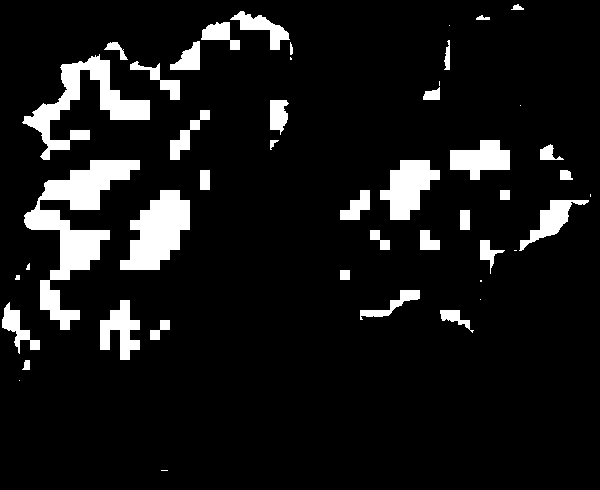

In [26]:
# If there are holes, go back to the top :)
Image('trento_dtm_ovr.png')

In [ ]:
# Better: https://siat.provincia.tn.it/IDT/raster/.public/

In [8]:
def downloadall(rooturl, pattern=r'href="([^"]+)"', destdir='dwn', callback=None):
    indexurl = urlopen(rooturl).read().decode()
    suffixes = re.findall(pattern, indexurl)
    print(len(suffixes))
    for suff in suffixes:
        dest = pjoin(destdir, basename(suff))
        if not exists(dest):
            print("GET ", rooturl+suff)
            urlretrieve(rooturl+suff, dest)
            if callback: callback(dest)
        else:
            print("SKIP", rooturl+suff)

In [46]:
rooturl2011 = 'https://siat.provincia.tn.it/IDT/raster/.public/lidar_2011_campolongo_dtm/'
downloadall(rooturl2011, pattern=r'"(dtm\d+\.asc)"')

25


In [9]:
rooturl2014 = 'https://siat.provincia.tn.it/IDT/raster/.public/lidar_2014_pat_dtm_asc/'

ZSTD6_OPT = '-co COMPRESS=ZSTD -co PREDICTOR=2 -co ZSTD_LEVEL=6 '

def compress(asc_zip):
    """One-by-one tif compression of file, to save space"""
    asc_name = basename(asc_zip)[:-4]
    dest = 'dwn/' + asc_name[:-3] + 'tif'
    src = f'/vsizip/{{{asc_zip}}}/{asc_name}'
    # This needs CPL_ZIP_ENCODING=UTF-8 (it's in the prelude)
    cmd = f'gdal_translate {S.TILE_OPT} {S.XTIFF_OPT} {ZSTD6_OPT} {src} {dest}'
    print(cmd)
    S.check_run(cmd)
    print(os.path.getsize(asc_zip), '->', os.path.getsize(dest))
    os.remove(asc_zip)

downloadall(rooturl2014, pattern=r'"(5h\d+_DTM.asc.zip)"', callback=compress)
# 25201 files * 2 MB = 50 GB.
# we can gain 50% with online tiff compression with ZSTD_LEVEL=6 & tiled
# 10 hours

25201
GET  https://siat.provincia.tn.it/IDT/raster/.public/lidar_2014_pat_dtm_asc/5h612050925_DTM.asc.zip
gdal_translate -co TILED=YES -co blockXsize=1024 -co blockYsize=1024  -co BIGTIFF=YES -co SPARSE_OK=TRUE -co NUM_THREADS=ALL_CPUS  -co COMPRESS=ZSTD -co PREDICTOR=2 -co ZSTD_LEVEL=6  /vsizip/{dwn/5h612050925_DTM.asc.zip}/5h612050925_DTM.asc dwn/5h612050925_DTM.tif
Input file size is 1000, 1000
0...10...20...30...40...50...60...70...80...90...100 - done.
37959 -> 19856
GET  https://siat.provincia.tn.it/IDT/raster/.public/lidar_2014_pat_dtm_asc/5h612050930_DTM.asc.zip
gdal_translate -co TILED=YES -co blockXsize=1024 -co blockYsize=1024  -co BIGTIFF=YES -co SPARSE_OK=TRUE -co NUM_THREADS=ALL_CPUS  -co COMPRESS=ZSTD -co PREDICTOR=2 -co ZSTD_LEVEL=6  /vsizip/{dwn/5h612050930_DTM.asc.zip}/5h612050930_DTM.asc dwn/5h612050930_DTM.tif
Input file size is 1000, 1000
0...10...20...30...40...50...60...70...80...90...100 - done.
54390 -> 34714
GET  https://siat.provincia.tn.it/IDT/raster/.public

In [41]:
!gdalinfo dwn/dtm000802.asc

Driver: AAIGrid/Arc/Info ASCII Grid
Files: dwn/dtm000802.asc
Size is 2020, 2020
Origin = (675990.000000000000000,5116010.000000000000000)
Pixel Size = (1.000000000000000,-1.000000000000000)
Corner Coordinates:
Upper Left  (  675990.000, 5116010.000) 
Lower Left  (  675990.000, 5113990.000) 
Upper Right (  678010.000, 5116010.000) 
Lower Right (  678010.000, 5113990.000) 
Center      (  677000.000, 5115000.000) 
Band 1 Block=2020x1 Type=Float32, ColorInterp=Undefined
  NoData Value=-9999
